# Q-Learning: Frozen Lake

### Import Libraries

In [26]:
%matplotlib notebook
# %matplotlib inline
import gym
from IPython.display import clear_output
import time
import numpy as np
import matplotlib.pyplot as plt

### Register Environment

In [2]:
from gym.envs.registration import register

try:
    
    register(
        id = 'FrozenLakeNotSplippery-v0', # Deve essere un nome personalizzato univoco
        entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
        kwargs = {'map_name':'4x4', 'is_slippery':False},
        max_episode_steps = 100,
        reward_threshold = 0.8196
    )
    
except:
    print("Probabilmente l'ambiente è già stato registrato, forse è la seconda volta che elabori questa cella")

### Load Environment

In [3]:
env = gym.make("FrozenLakeNotSplippery-v0")

#### Same random observation

In [4]:
observation = env.reset()

for episode in range(4):
#     print(observation) # Rappresenta il numero di cella in cui si trova
    env.render()
    time.sleep(0.2)
    clear_output(wait=True)
    
    action = env.action_space.sample() # Scelta casuale di una action
    
    print(f'Observation: {observation} -> Action: {action}')
    
    observation, reward, done, info = env.step(action) # Esecuzione della scelta
    
env.close()

Observation: 0 -> Action: 3


### Creating the Q-Learning Table

Per richiamare la Tabella è necessario mappare tutte le possibili coppie stato-azione. La relativa reward attesa, per l'azione presa in quello stato, sarà successivamente aggiornata.

In [5]:
action_size = env.action_space.n
state_size = env.observation_space.n

print(f"Abbiamo quindi n.{action_size} possibili azioni con n.{state_size} possibili stati.")

Abbiamo quindi n.4 possibili azioni con n.16 possibili stati.


In [6]:
q_table = np.zeros([state_size, action_size])
q_table.shape

(16, 4)

In [7]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Hyperparameters

Nella scelta degli iper-parametri è buona norma partire dai valori da pubblicazioni oppure tramite propri esperimenti.

In [8]:
EPOCHS = 20000  # 5000
ALPHA = 0.8     # Leargning rate
GAMMA = 0.95    # Discount rate
# MAX_EPISODE = 100

##### Exploiration vs Exploitation parameters

Ad ogni epoca diminuisce il valore di epsilon secondo una funzione (lineare, esponenziale, ...) definita dall'utente. Il valore di epsilon, confrontato con un valore casuale (0-1), determinerà la scelta tra azione casuale oppure azione appresa dall'esperienza.

In [9]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01     # Minima probabilità di esplorazione tramite scelte casuali
decay_rate = 0.0001    # 0.001

### Q-Table Update Functions

In [10]:
def epsilon_greedy_action_selection(epsilon, q_table, discrete_state):
    
    """
    L'exploitation usa il valore migliore della combinazione Q(s,a)
    """
    
    random_number = np.random.random()
    
    if random_number > epsilon:                   # Scelta dell'azione appresa
        state_row = q_table[discrete_state,:]
        action = np.argmax(state_row)             # Restituisce l'indice con il valore maggiore
    
    else:
        action = env.action_space.sample()
    
    return action

In [11]:
def compute_next_q_value(old_q_value, reward, next_optimal_q_value):
    
    """
    Funzione di aggiornamento dell'apprendimento per rinforzo...
    """
    
    return old_q_value + ALPHA * (reward + GAMMA * next_optimal_q_value - old_q_value)

In [12]:
def reduce_epsilon(epsilon, epoch):
    
    return min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*epoch)

### Agent training

In [13]:
q_table = np.zeros([state_size, action_size])
total_reward= 0
epsilon = 1

epsilon_history = []

In [14]:
rewards = []

"""
EPOCHS = Numero di partite (non numero di mosse/step)
"""

for episode in range(EPOCHS):
    
    state = env.reset()      # Obbligatorio ad ogni inizio partita
    done = False
    total_rewards = 0
    
    while not done:
        
        action = epsilon_greedy_action_selection(epsilon, q_table, state)
        
        new_state, reward, done, info = env.step(action)
        
        #################################################
        
        old_q_value = q_table[state, action]
        next_optimal_q_value = np.max(q_table[new_state,:])
        next_q = compute_next_q_value(old_q_value, reward, next_optimal_q_value)
        q_table[state, action] = next_q
        
        ##################################################
        
        state = new_state
        
        total_rewards = total_rewards + reward
        
    
    episode += 1
    
    epsilon_history.append(epsilon)
    
    epsilon = reduce_epsilon(epsilon, episode)
    
    rewards.append(total_rewards)
    
env.close()

In [15]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

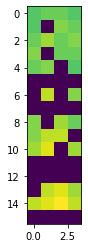

In [18]:
plt.imshow(q_table)
plt.show()

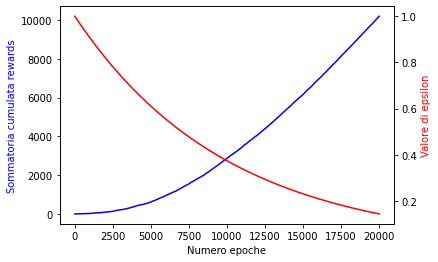

In [17]:
fig,ax = plt.subplots()

ax.plot(range(EPOCHS), np.cumsum(rewards),
       color = "blue",
       marker = '')
ax.set_xlabel("Numero epoche")
ax.set_ylabel("Sommatoria cumulata rewards", color="blue")

ax2 = ax.twinx()
ax2.plot(range(EPOCHS), epsilon_history,
         color = "red",
         marker = '')
ax2.set_ylabel("Valore di epsilon", color="red")

plt.show()

### Using Learned Q-Table Result

In [23]:
state = env.reset()
rewards = 0

for _ in range(100):
    env.render()
    
    action = np.argmax(q_table[state])
    
    state, reward, done, info = env.step(action)
    
    time.sleep(1)
#     clear_output(wait=True)
    
    if done:
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


## Training with Active Visualization

In [28]:
q_table = np.zeros([state_size, action_size])
total_reward = 0
epsilon = 1

<IPython.core.display.Javascript object>


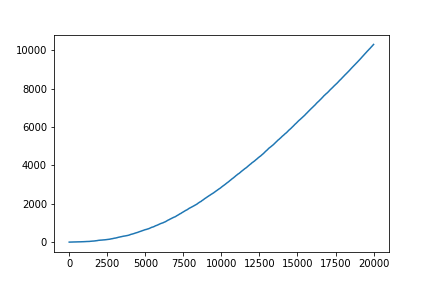

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
log_interval = 1000       # Stampa ogni 1000 steps
epoch_plot_tracker = []
total_reward_plot_tracker = []



for episode in range(EPOCHS):
    
    state = env.reset()      # Obbligatorio ad ogni inizio partita
    done = False
    total_rewards = 0
    
    while not done:
        
        action = epsilon_greedy_action_selection(epsilon, q_table, state)
        
        new_state, reward, done, info = env.step(action)
        
        #################################################
        
        old_q_value = q_table[state, action]
        next_optimal_q_value = np.max(q_table[new_state,:])
        next_q = compute_next_q_value(old_q_value, reward, next_optimal_q_value)
        q_table[state, action] = next_q
        
        ##################################################
        
        state = new_state
        
#         
#         print(f"Epsilon {epsilon}")
#         print(f"Epoch {epoch}, total reward {total_rewards}")
#         print(f"Current state {state} -> Performing action {action}")
#         env.render()
#         print(q_table)
        
#         time.sleep(0.01)
#         clear_output(wait=True)        
#
    
    episode += 1
    
    epsilon_history.append(epsilon)
    
    epsilon = reduce_epsilon(epsilon, episode)
    
    total_reward = total_reward + reward
    
    total_reward_plot_tracker.append(total_reward)
    epoch_plot_tracker.append(episode)

    ##########################################
    
    if episode % log_interval == 0:
        ax.clear()
        ax.plot(epoch_plot_tracker, total_reward_plot_tracker)
        fig.canvas.draw()

    ##########################################
        
env.close()    